## Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. In order to fight churn, Model Fitness has digitized a number of its customer profiles. Main objective is to analyze them and come up with a customer retention strategy.


## Table of contents

- [**Step 1. General information and preparing the data**](#first-step)
- [**Step 2. Carry out exploratory data analysis (EDA)**](#second-step)
    - [Look at the dataset: does it contain any missing features? Study the mean values and standard deviation](#mean-values-stnd-dev) 
    - [Look at the mean feature values in two groups: for those who left (churn) and for those who stayed ](#mean-features-two-groups) 
    - [Plot bar histograms and feature distributions for those who left (churn) and those who stayed](#feature-distribution)
    - [Build a correlation matrix and display it](#correlation-matrix)
- [**Step 3. Build a model to predict user churn**](#third-step)
    - [Divide the data into train and validation sets using the train_test_split() function](#split-data)
    - [Train the model on the train set with two methods: logistic regression, random forest](#train-model)
    - [Evaluate accuracy, precision, and recall for both models using the validation data](#metrics)
- [**Step 4. Create user clusters**](#fourth-step)
    - [Standardize the data ](#standardize-data ) 
    - [Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram](#dendrograms) 
    - [Train the clustering model with the K-means algorithm and predict customer clusters](#Kmeans)
    - [Look at the mean feature values for clusters](#mean-values-for-clusters) 
    - [Plot distributions of features for the clusters](#distribution-features-for-clusters)
    - [Calculate the churn rate for each cluster](#churn-rate)
- [**Step 5. Create user clusters**](#fifth-step)   

## Step 1. General information and preparing the data <a id="first-step"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans


In [2]:
!pip install -U plotly

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: plotly in /home/jovyan/.local/lib/python3.7/site-packages (4.14.3)


In [3]:
pip install seaborn --upgrade

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# read the data 
gym_data = pd.read_csv('gym_churn_us.csv')
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


**CONCLUSION**

We read data wich was provided by Model Fitness and contains information on churn for a given month and  on the month preceding it. We have 14 columns and 4000 rows. There is no missing values.

## Step 2. Carry out exploratory data analysis (EDA) <a class="anchor" id="second-step"></a>

### Look at the dataset: does it contain any missing features? Study the mean values and standard deviation <a class="anchor" id="mean-values-stnd-dev"></a>

In [6]:
gym_data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


The database looks complete enough. Although it would be possible to add data on individual classes with trainers, because they can significantly affect the retention of clients, as well as the income of the gym chain, since one-to-one training with a trainer is usually the most expensive work in fitness centers. 
Analyzing mean values and standard deviation we can notice that features "Gender", "Partner", "Promo friends", "Contract period", "Group visits", "Month to end contract", "Lifetime" a low standard deviation indicates that values are clustered close to the mean. In other features almost all mean values higher than standard deviation.

### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed <a class="anchor" id="mean-features-two-groups"></a>

In [7]:
churn = gym_data.groupby('Churn').mean()
churn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Studying the average parameters, we can note that among clients who leave gym is not located so close or not all of them are located near their place of residence or close to work. That is, the remoteness of the fitness room affects the churn of customers. Also, those who work for a partner company on average leave less often, possibly due to attractive conditions. The same situation with the feature 'Promo_friends'. It makes sense that the contract period keeps clients. In addition, people attending group classes stay longer on average. In terms of age, the average age people who stay is around 30, and the average age is 27 who leave the gym. On average, people who stay in the gym spend more money on additional services than those who leave. Perhaps they (who churn) are not satisfied enough with the additional services. The average is those who visit the gym more than 2 times a week. While those who leave did not go to the gym on average, no more than 1.5 times a week.

### Plot bar histograms and feature distributions for those who left (churn) and those who stayed <a class="anchor" id="feature-distribution"></a>

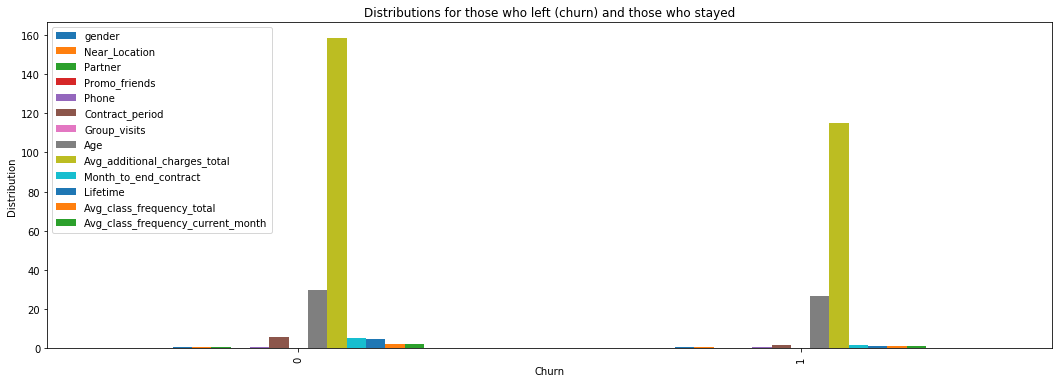

In [8]:
churn.plot(kind='bar', figsize=(18, 6))
plt.title('Distributions for those who left (churn) and those who stayed')
plt.xlabel('Churn')
plt.ylabel('Distribution')
plt.show()

On this graph we can see the distribution of features for those who left(1) and for those who stayed(0). The conclusions made in the previous step now look more clear. To compare feature distributions separatly we will plot histograms.

In [9]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [10]:
def graph(df, feature):
    sns.distplot(df[feature], bins=10)
    plt.xlabel(df[feature].name)
    plt.ylabel('Distribution')
    plt.title('Distribution histogram')
    plt.show()

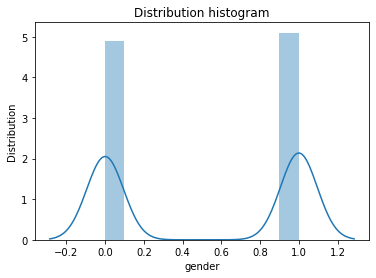

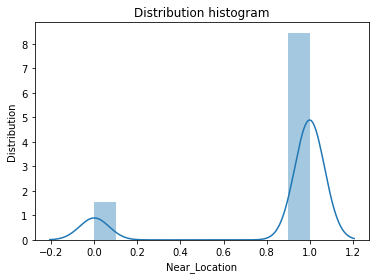

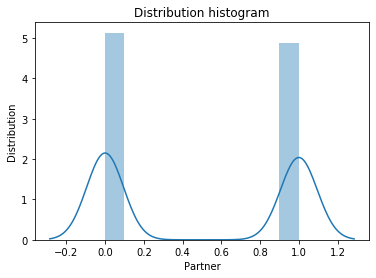

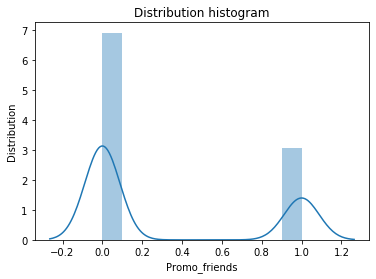

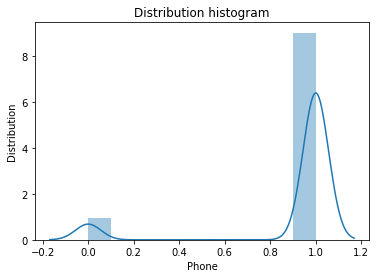

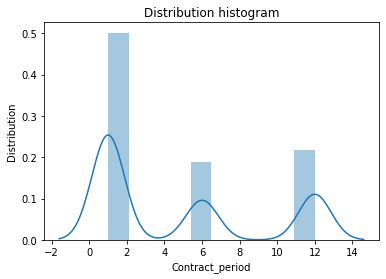

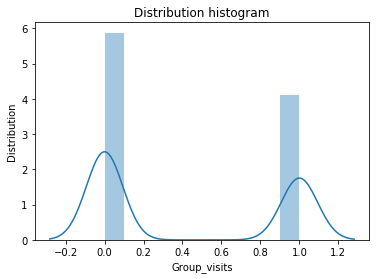

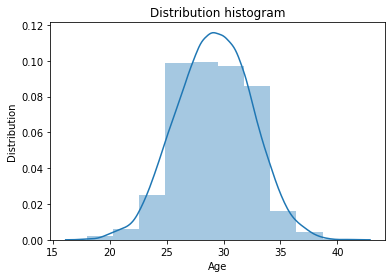

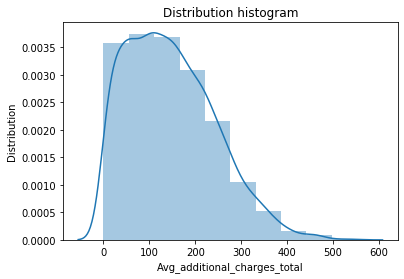

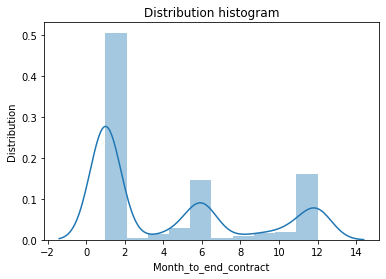

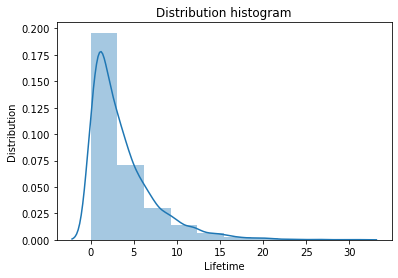

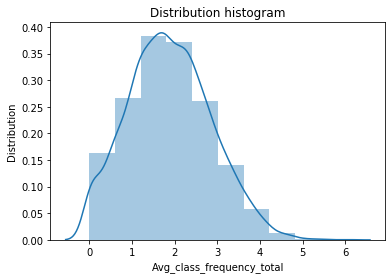

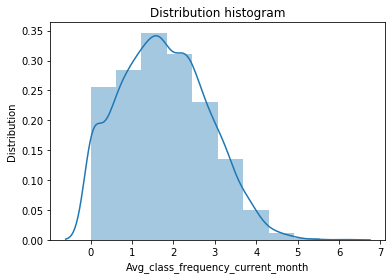

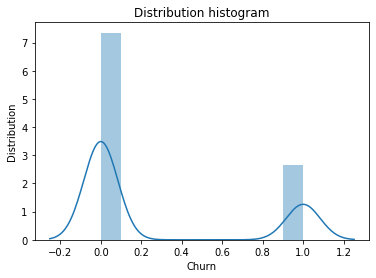

In [11]:
graph(gym_data, 'gender')
graph(gym_data, 'Near_Location')
graph(gym_data, 'Partner')
graph(gym_data, 'Promo_friends')
graph(gym_data, 'Phone')
graph(gym_data, 'Contract_period')
graph(gym_data, 'Group_visits')
graph(gym_data, 'Age')
graph(gym_data, 'Avg_additional_charges_total')
graph(gym_data, 'Month_to_end_contract')
graph(gym_data, 'Lifetime')
graph(gym_data, 'Avg_class_frequency_total')
graph(gym_data, 'Avg_class_frequency_current_month')
graph(gym_data, 'Churn')

Analyzing distribution of features we can notice that the most clients live or work near the gym. We can conclude that the remoteness of the gym from home or work is a good reason to churn the gym.
The features 'gender' and 'partner' are almost evenly distributed between the corresponding values. There are fewer people attending group classes. The maximum customer churn occurs after two months of classes. The average age of those attending the gym is closer to 30 years. Most go to the gym 1.5-2 times a week. Most customers spend on average up to $ 160. And yet more customers remain.

### Build a correlation matrix and display it <a class="anchor" id="correlation-matrix"></a>

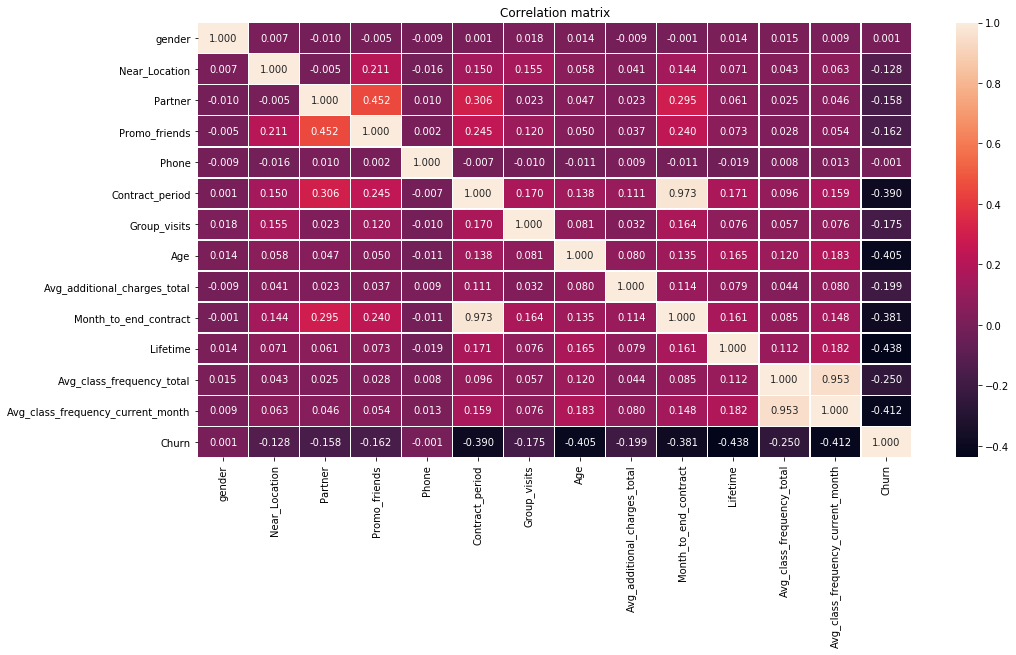

In [12]:
plt.figure(figsize=(16, 8))
plt.title('Correlation matrix')
sns.heatmap(gym_data.corr(), annot=True, linewidths=.5, fmt='.3f')
plt.show()

We can say that some features in our data are multicolliniary. Features "Month_to_end_contract" and "Contract_period", "Avg_class_frequency_total" and "Avg_class_frequency_current_month" have a strong correlation. To get rid of multicollinearity, we'll remove one of them from each pair from the DataFrame.

In [13]:
gym_data.drop('Avg_class_frequency_current_month', axis = 1, inplace = True)
gym_data.drop('Month_to_end_contract', axis = 1, inplace = True)
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0


We got rid variables 'Avg_class_frequency_current_month' and 'Month_to_end_contract' and we will be able to build a more objective model.

**CONCLUSION**

We found that overall the data provided by the company is fairly complete. Except that there is no information on personal training.

Customer churn is affected by remoteness form home or work, whether the user is an employee of a partner company, availability of a promo code, attending group classes. Contracts concluded for a longer period of time retain clients. On average people visit gym 1,5-2 times a week and thhe average age of visitors is closer to 30 years. Gender has virtually no effect on customer churn and gym attendance.

To get rid of multicollinearity we removed variables 'Avg_class_frequency_current_month' and 'Month_to_end_contract'.


## Step 3. Build a model to predict user churn <a class="anchor" id="third-step"></a>

### Divide the data into train and validation sets using the train_test_split() function <a class="anchor" id="split-data"></a>

In [14]:
# dividing the data into features (the X matrix) and a target variable (y)
X = gym_data.drop('Churn', axis = 1)
y = gym_data['Churn']

# dividing the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



We splited the data into features (X) and target variable (y).

### Train the model on the train set with two methods: logistic regression, random forest <a class="anchor" id="train-model"></a>

In [15]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [16]:
# define the algorithm for the logistic regression model
model_LR = LogisticRegression(random_state=0)
# train the model
model_LR.fit(X_train, y_train)
# make predictions
predictions_LR = model_LR.predict(X_test)
model_LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# define the algorithm for the random forest model
model_RFC = RandomForestClassifier(n_estimators = 100, random_state = 0)
# train the random forest model
model_RFC.fit(X_train, y_train)
# make predictions
predictions_RFC = model_RFC.predict(X_test) 
model_RFC

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

We trained the model on the train set with two methods: logistic regression and Random forest. Further we can evaluate metrics.

### Evaluate accuracy, precision, and recall for both models using the validation data <a class="anchor" id="metrics"></a>

In [18]:
# define the function that will output our metrics
def print_all_metrics(y_true, y_pred, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    

In [19]:
# print all metrics
print_all_metrics(y_test, predictions_LR , title='Metrics for logistic regression:')


Metrics for logistic regression:
	Accuracy: 0.88
	Precision: 0.76
	Recall: 0.77


In [20]:
# print all metrics
print_all_metrics(y_test, predictions_RFC, title = 'Metrics for random forest:')


Metrics for random forest:
	Accuracy: 0.89
	Precision: 0.78
	Recall: 0.77


Our metrics are aiming for 80% but there is still room for improvement. Choosing from two models, we can conclude that the random forest has slightly better indicators than the logistic regression.

**CONCLUSION**

On this step we divided the data into train and test sets with two methods: logistic regression and random forest. We evaluated the metrics where Recall wath the same for both models but in whole forest regression model is a litle bit better.

## Step 4. Create user clusters <a class="anchor" id="fourth-step"></a>

### Standardize the data <a class="anchor" id="standardize-data"></a>

In [21]:
# creating a scaler class object (normalizer)
scaler = StandardScaler()
# training the normalizer and transforming the dataset 
x_sc = scaler.fit_transform(gym_data.drop(columns = ['Churn']))

We standardized our data.

### Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram <a class="anchor" id="dendrogram"></a>

In [22]:
#build a matrix of distances
linked = linkage(x_sc, method = 'ward') 

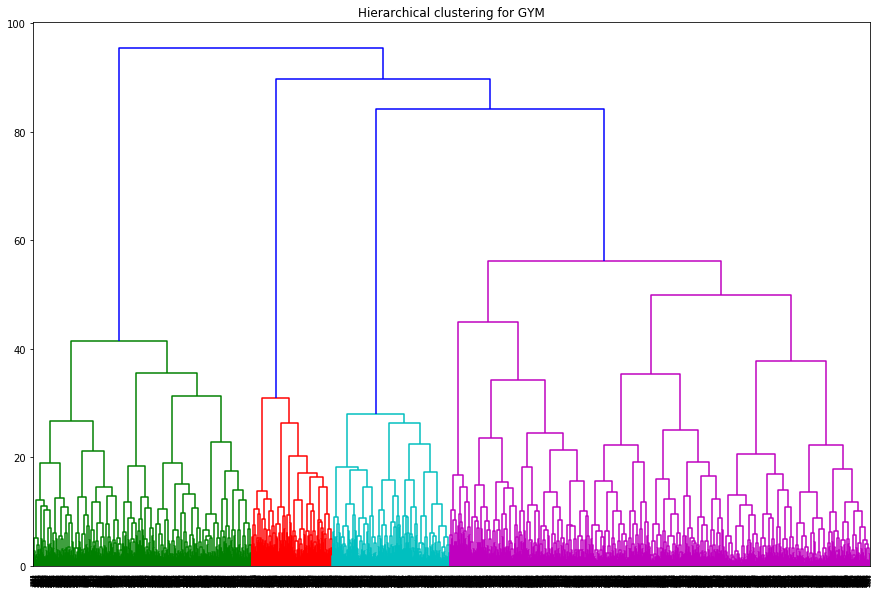

In [23]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

We visualized data clusters with the dandrogram. The suggested optimal number of clusters (5) corresponds to the five different colors on the plot.

### Train the clustering model with the K-means algorithm and predict customer clusters <a class="anchor" id="Kmeans"></a>

In [24]:
km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(x_sc) 

We setted the number of clusters as 5,  applyed the algorithm to the data and forming cluster vector.

### Look at the mean feature values for clusters <a class="anchor" id="mean-values-for-clusters"></a>

In [25]:
# store cluster labels in the field of dataset
gym_data['cluster_km'] = labels

In [26]:
gym_mean = gym_data.groupby('cluster_km').mean()
gym_mean

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
cluster_km,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


Now we have a new column with clusters and grouped the data by each cluster with mean values of features. THe following featers by clusters are similar: gender, age, Avg_class_frequency_total strives for two in each cluster, Avg_additional_charges_total is about 140-150$ and Lifetime - 3-4 months.
In other features there are differences in values between clusters. For example, in 4 clusters from five average value of feature Near_Location is almost one and only in cluster number 0 this value is null. The same for feature 'Phone', but null in cluster number 4. The average value of feature Partner is almost 1 in cluster 1 and only 0.24 in cluster number 2. The similar picture in feature Promo_friends, in cluster 1 mean value is 0.89 and in clusters 2 - 0.06. As for contract period for cluster number 1 the mean value is 8, but for others clusters this value between 3 and 5. The mean value of Group_visits for cluster 2 is null but for cluster 3 is 1. The mean value of Churn is the highest in cluster number 0 and consist 0,4. After follows cluster number 2 with mean value 0.38 and the lowest value in cluster number 1.

### Plot distributions of features for the clusters <a class="anchor" id="distribution-features-for-clusters"></a>

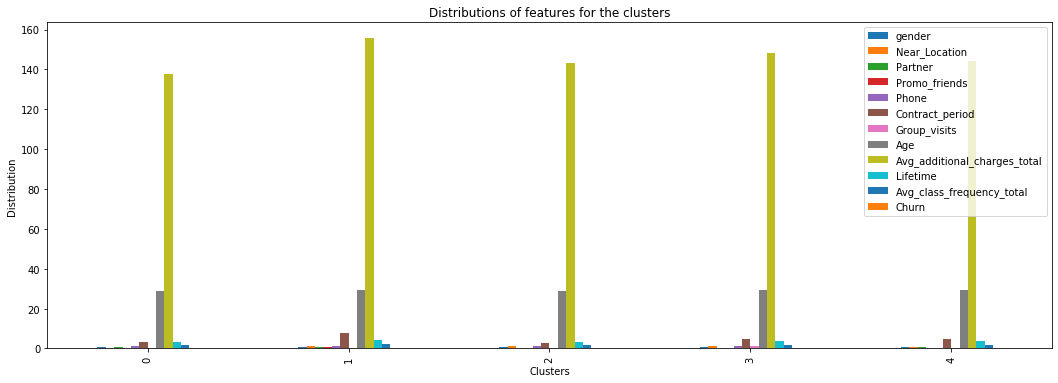

In [27]:
gym_mean.plot(kind='bar', figsize=(18, 6))
plt.title('Distributions of features for the clusters')
plt.xlabel('Clusters')
plt.ylabel('Distribution')
plt.show()

We visualized distributions of features for the clusters and on this graph we can see all conclusions which was made above.

### Calculate the churn rate for each cluster <a class="anchor" id="churn-rate"></a>

In [28]:
churn_rate = gym_data.groupby('cluster_km')['Churn'].mean()
churn_rate = churn_rate.sort_values(ascending=False)
churn_rate

cluster_km
0    0.399287
2    0.381625
4    0.266839
3    0.200918
1    0.120952
Name: Churn, dtype: float64

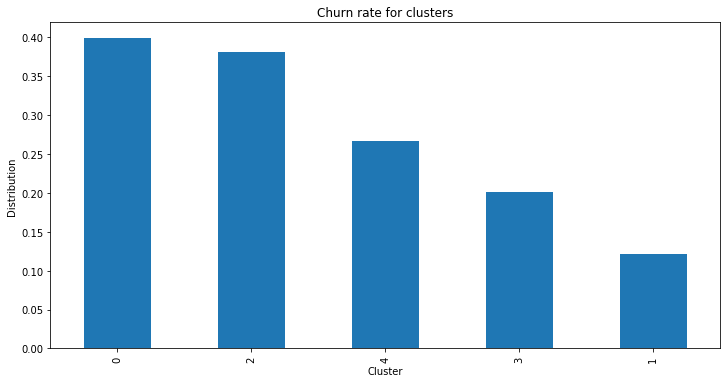

In [29]:
churn_rate.plot(kind='bar', figsize=(12,6), x='cluster_km', y='Churn')
plt.title('Churn rate for clusters')
plt.xlabel('Cluster')
plt.ylabel('Distribution')
plt.show()

Using this gragh we can notice that the most people who churn the Gym from clusters number 0 and 2. Least of all people leave the gym from cluster 1.

**CONCLUSION**

We standardized the data, built a matrix of distances and ploted a dendrogram. We trained the clustering model with the K-means algorithm and predicted customer clusters. Looked over mean values for each feature by cluster and vizualized Churn rate for clusters on bar graph.  We have identified the difference in mean values of features by clusters. We found out that the main outflow of people falls on cluster number 0.

## Step 5. General conclusion <a class="anchor" id="fifth-step"></a>

We have analyzed the data wich was provided by Model Fitness and contains information on churn for a given month and on the month preceding it. The data consist of 14 columns and 4000 rows and there is no missing values. We found that the database complete enough. 

We can conclude that the following features affect the retention of gym clients: 
- proximity to home or work; 
- special conditions when working in a partner company; 
- availability of a promo code; 
- long-term contract; 
- more frequent attendance of group classes; 
- age is closer to 30 years; 
- visit to the sports hall on average 2 times a week.

We can also describe people who churn the gym: 
- average age is about 27;
- amount of visits in average 1,5 per week;
- period of contract no longer than 2 monthes;
- they spent less money for additional services than those who stay;
- they are less likely to attend group classes.

Having studied all features, having made a prediction model and created user clusters we can formulate the following recomendations for improving service and increasing customers' retention:
- introduce a bonus system for the certain number of visits per week or month;
- offer discounts on the purchase of longer contracts; 
- conduct a user survey and expand additional services (for example, revise the range of the fitness bar or add a sauna to the facilities; 
- offer individual training packages with a trainer; 
- arrange promotions, for example, a weekly visit to any group classes for free with the subsequent purchase of a subscription; 
- conduct a survey and if necessary, expand the range of group programs.
